In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob, sys, pickle, sobol_seq, numpy
from scipy.stats import norm, truncnorm, multivariate_normal
from scipy.special import logsumexp
from tqdm import tqdm
import pandas as pd
import pickle
import seaborn as sns

# Functions

In [2]:
# choice: 0: alpha, 1:beta, 2:zeta
def visualize_fitting(param, choice, param_name, path):
    
    
    #create df containing all chains for fitting parameter
    dic_chain1={}
    dic_chain2={}
    dic_chain3={}
    dic_chain4={}

    for i in range(2000):
        dic_chain1[i]=param[i][0][choice]
        dic_chain2[i]=param[i][1][choice]
        dic_chain3[i]=param[i][2][choice]
        dic_chain4[i]=param[i][3][choice]

    df_c1=pd.DataFrame.from_dict(dic_chain1, orient='index')
    df_c2=pd.DataFrame.from_dict(dic_chain2, orient='index')
    df_c3=pd.DataFrame.from_dict(dic_chain3, orient='index')
    df_c4=pd.DataFrame.from_dict(dic_chain4, orient='index')
    df=pd.concat([df_c1, df_c2, df_c3, df_c4], axis=1)
    df.reset_index(level=0, inplace=True) 
    df.columns=['iterations', 'chain_1', 'chain_2','chain_3','chain_4']

    print(df.median())

    df = df.melt('iterations', var_name='MCMC chains',  value_name=param_name) # melting for plotting multiple columns

    
    
    %matplotlib notebook
    plt.figure(figsize=(10, 8))
    sns.lineplot(data=df, x='iterations', y=param_name, hue='MCMC chains')
    sns.despine(top=True,offset=5)
    plt.xlabel('iterations', fontsize=24)
    plt.ylabel(param_name, fontsize=24)
    plt.tick_params(labelsize=16)
    sns.despine(top=True,offset=5)
    plt.tight_layout()
    plt.savefig(path, dpi=250)

In [3]:
# choice: 0: alpha, 1:beta, 2:zeta
def visualize_density(param, choice, param_name, path):
    %matplotlib notebook
    
    
    #create df containing all chains for fitting parameter
    dic_chain1={}
    dic_chain2={}
    dic_chain3={}
    dic_chain4={}

    for i in range(2000):
        dic_chain1[i]=param[i][0][choice]
        dic_chain2[i]=param[i][1][choice]
        dic_chain3[i]=param[i][2][choice]
        dic_chain4[i]=param[i][3][choice]

    df_c1=pd.DataFrame.from_dict(dic_chain1, orient='index')
    df_c2=pd.DataFrame.from_dict(dic_chain2, orient='index')
    df_c3=pd.DataFrame.from_dict(dic_chain3, orient='index')
    df_c4=pd.DataFrame.from_dict(dic_chain4, orient='index')
    df=pd.concat([df_c1, df_c2, df_c3, df_c4], axis=1)
    df.reset_index(level=0, inplace=True) 
    df.columns=['iterations', 'chain_1', 'chain_2','chain_3','chain_4']

    
    # create df containing all chains
    df = df.melt('iterations', var_name='MCMC chains',  value_name=param_name) # melting for plotting multiple columns
    
    
    plt.figure(figsize=(8, 6))
    # List of five airlines to plot
    chains = ['chain_1', 'chain_2', 'chain_3','chain_4']

    # Iterate through the five airlines
    for chain in chains:
        # Subset 
        subset = df[df['MCMC chains'] == chain]

        # Draw the density plot
        sns.distplot(subset[param_name], hist = False, kde = True,
                     kde_kws = {'linewidth': 2},
                     label = chain)

    # Plot formatting
    sns.despine(top=True,offset=5)
    plt.tick_params(labelsize=16)
    #plt.tight_layout()
    plt.legend(title = 'MCMC Chain')
    plt.title(param_name, fontsize=20)
    
    plt.xlabel(' ', fontsize=20)
    
    plt.ylabel('Density', fontsize=20)
    plt.savefig(path, dpi=250)


## noise: weber

In [5]:
file_weber = open('C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/noise_weber_agentid_0.pkl', 'rb')
weber = pickle.load(file_weber)

In [6]:
param_wb = weber[0] #shape: (2000, 4, 3)
lkd_wb = weber[1]
mrglkd_wb = weber[2] 
inference_validated_wb = weber[3]

In [9]:
param_wb

array([[[0.25      , 0.5       , 0.5       , 0.75      ],
        [0.375     , 0.25      , 0.75      , 0.375     ],
        [0.125     , 0.75      , 0.25      , 1.125     ],
        [0.1875    , 0.375     , 0.625     , 0.1875    ]],

       [[0.21865004, 0.53088456, 0.42227748, 0.70554897],
        [0.375     , 0.25      , 0.75      , 0.375     ],
        [0.12723927, 0.76374767, 0.24156914, 1.02134441],
        [0.1875    , 0.375     , 0.625     , 0.1875    ]],

       [[0.21627002, 0.53488146, 0.41098001, 0.75300679],
        [0.375     , 0.25      , 0.75      , 0.375     ],
        [0.14542373, 0.83494653, 0.22402589, 0.92134679],
        [0.1875    , 0.375     , 0.625     , 0.1875    ]],

       ...,

       [[0.0344277 , 0.39641434, 0.0177848 , 0.0894752 ],
        [0.00669023, 0.41774616, 0.01797674, 0.09391946],
        [0.44583889, 0.00616482, 0.03689246, 0.09428372],
        [0.00316311, 0.39559057, 0.03412814, 0.09080792]],

       [[0.0344277 , 0.39641434, 0.0177848 , 0.0894

In [7]:
file_weber.close()

iterations    999.500000
chain_1         0.049244
chain_2         0.061932
chain_3         0.047393
chain_4         0.226210
dtype: float64


<IPython.core.display.Javascript object>


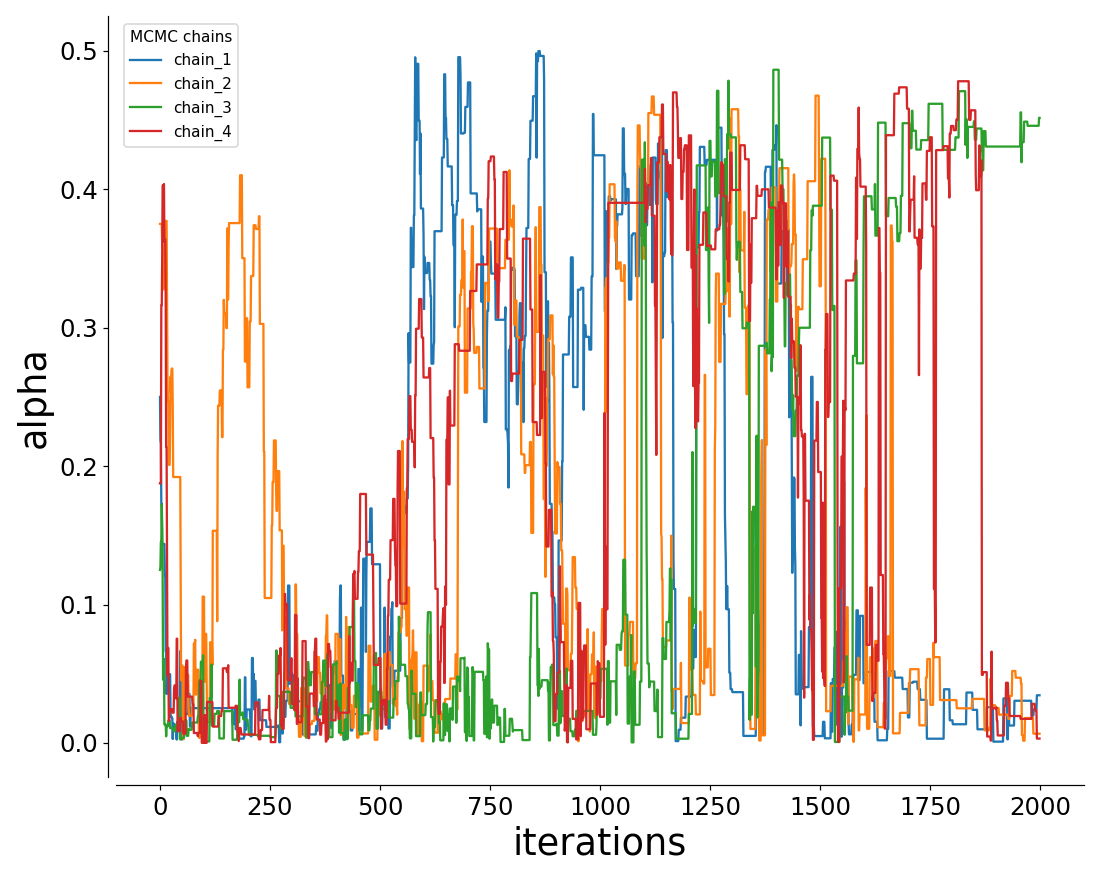

In [11]:
visualize_fitting(param_wb, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_alpha')

<IPython.core.display.Javascript object>


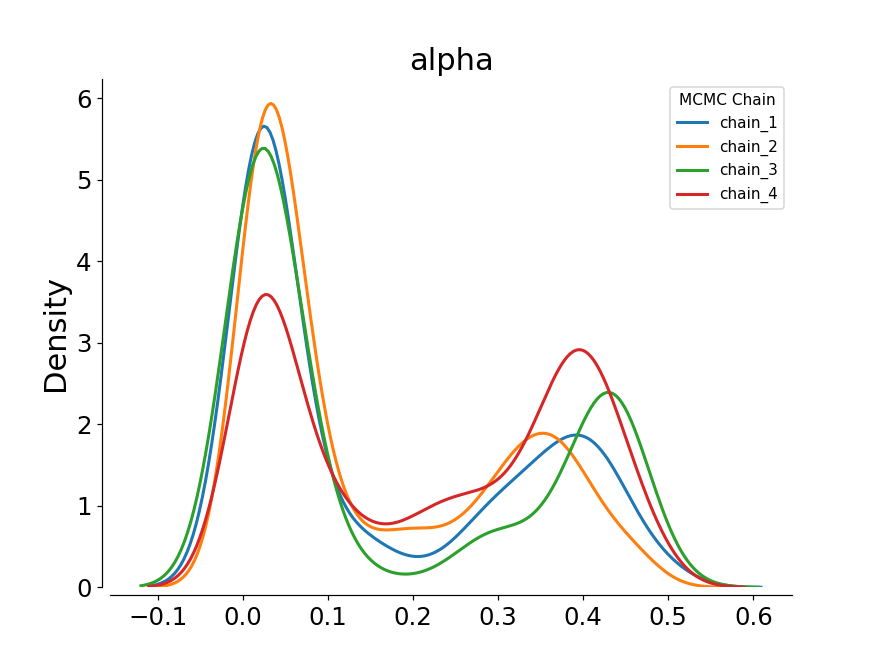

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [10]:
visualize_density(param_wb, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_alpha_density')

iterations    999.500000
chain_1         0.240898
chain_2         0.214541
chain_3         0.286599
chain_4         0.062108
dtype: float64


<IPython.core.display.Javascript object>


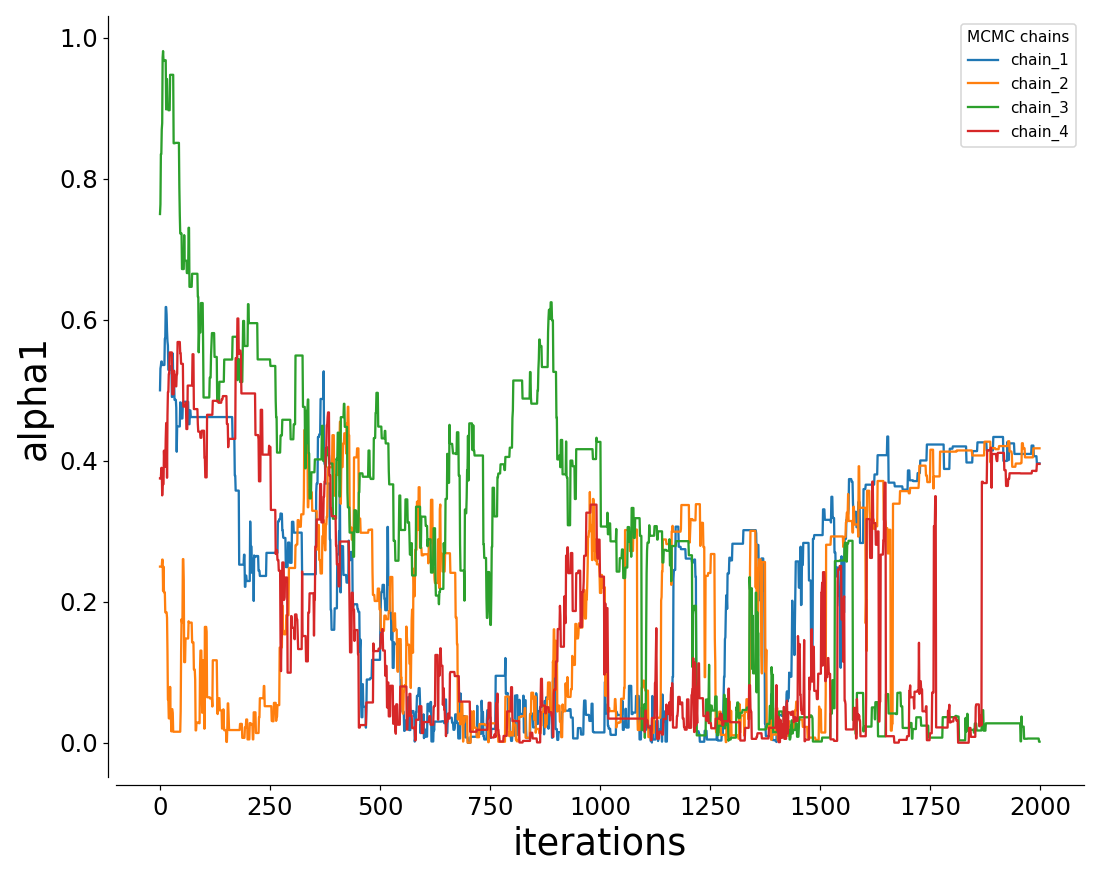

In [12]:
visualize_fitting(param_wb, 1, 'alpha1', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_alpha1')

<IPython.core.display.Javascript object>


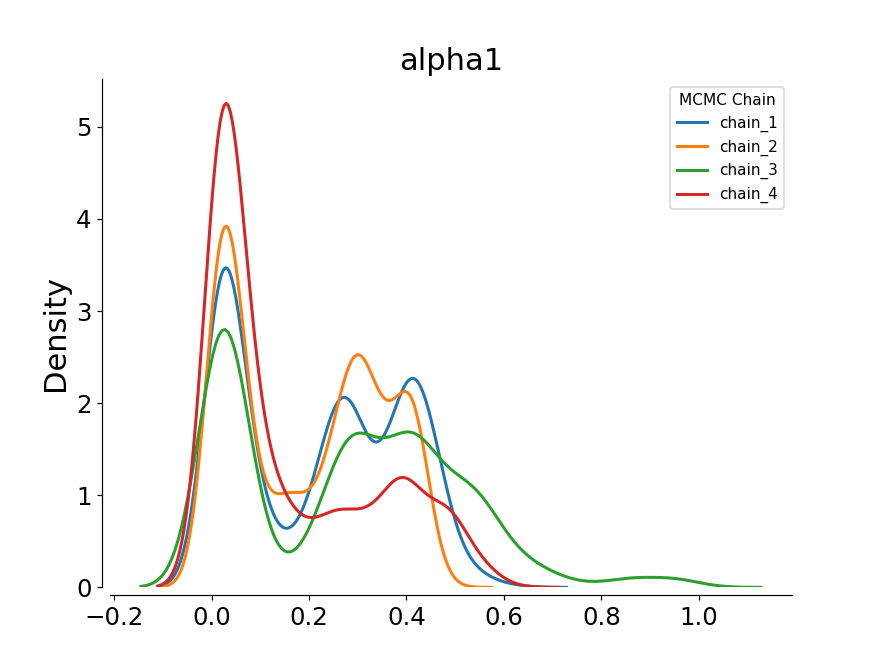

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [13]:
visualize_density(param_wb, 1, 'alpha1', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_alpha1_density')

iterations    999.500000
chain_1         0.030790
chain_2         0.025235
chain_3         0.028808
chain_4         0.030466
dtype: float64


<IPython.core.display.Javascript object>


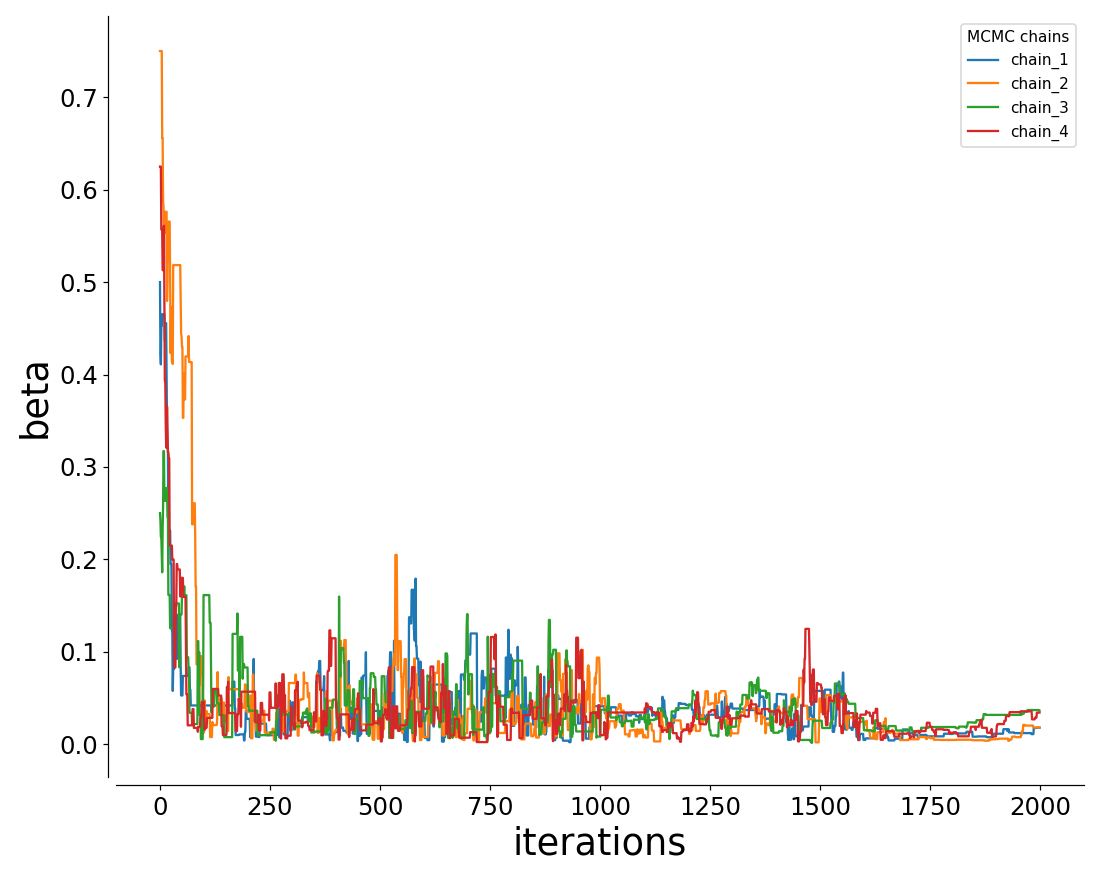

In [14]:
visualize_fitting(param_wb, 2, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_beta')

<IPython.core.display.Javascript object>


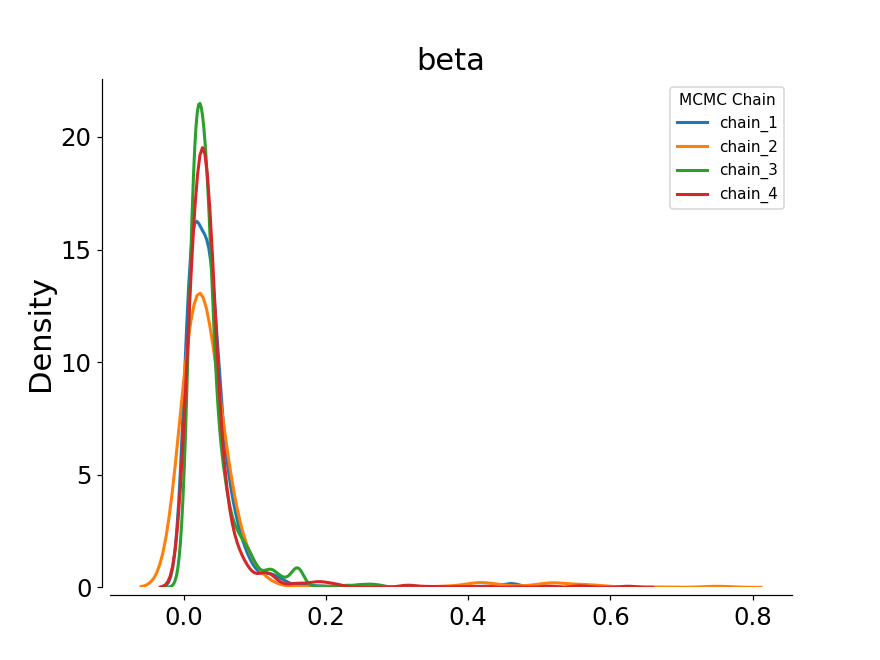

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [15]:
visualize_density(param_wb, 2, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_beta_density')

iterations    999.500000
chain_1         0.166646
chain_2         0.200490
chain_3         0.212013
chain_4         0.172561
dtype: float64


<IPython.core.display.Javascript object>


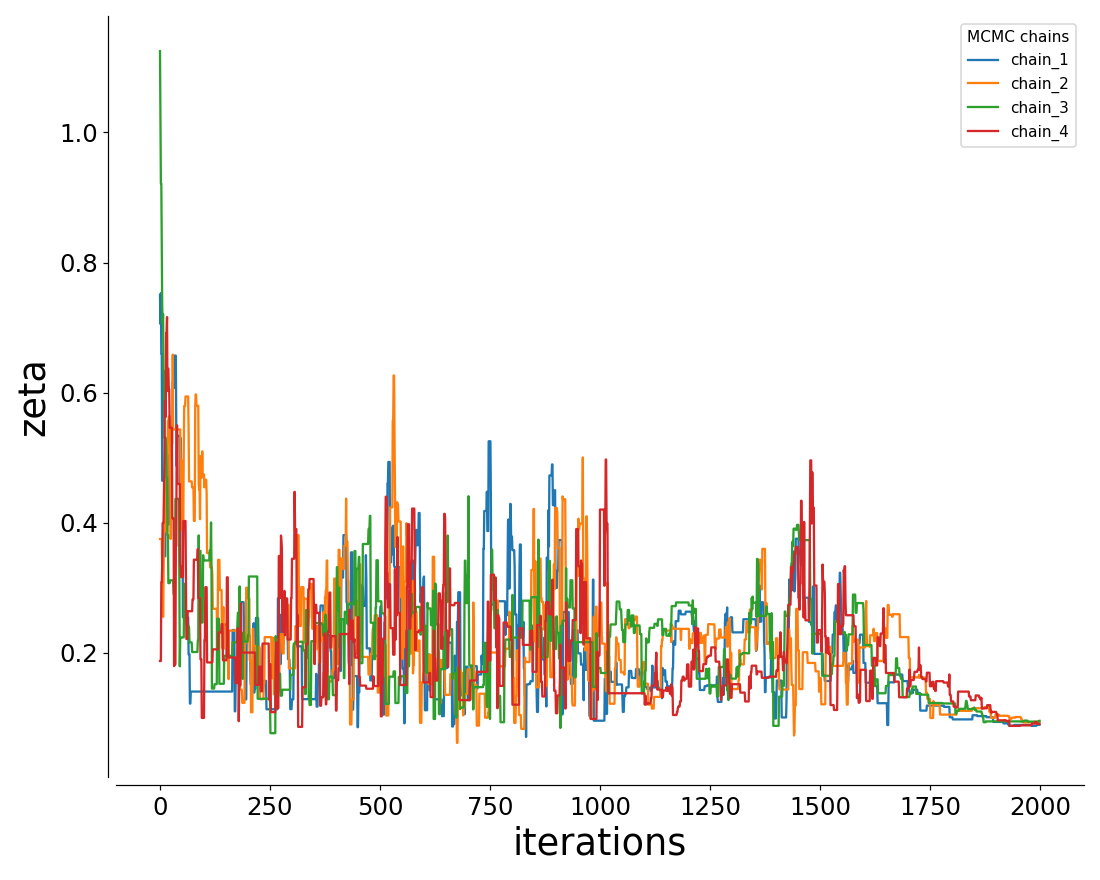

In [16]:
visualize_fitting(param_wb, 3, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_zeta')

<IPython.core.display.Javascript object>


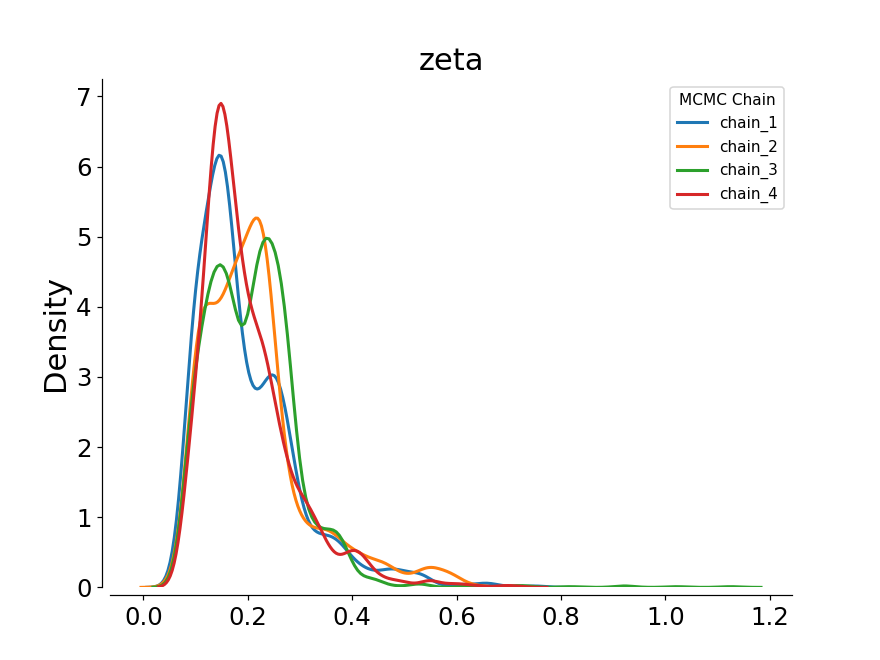

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [17]:
visualize_density(param_wb, 3, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_zeta_density')

## noise: white

In [19]:
file_white = open('C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/noise_white_agentid_0.pkl', 'rb')
white = pickle.load(file_white)
param_wh = white[0] #shape: (2000, 4, 3)
lkd_wh = white[1]
mrglkd_wh = white[2] 
inference_validated_wh = white[3]
file_white.close()

iterations    999.500000
chain_1         0.266525
chain_2         0.268094
chain_3         0.080012
chain_4         0.285272
dtype: float64


<IPython.core.display.Javascript object>


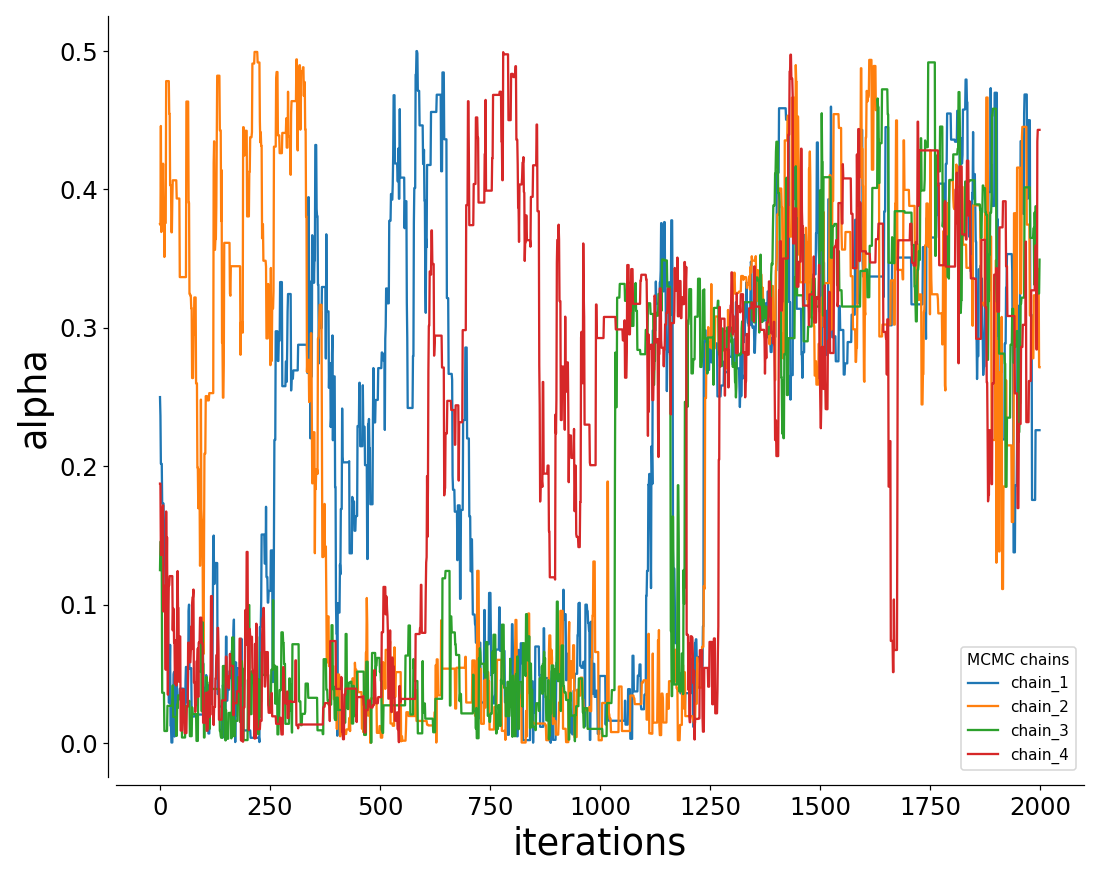

In [20]:
visualize_fitting(param_wh, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/White_alpha')

<IPython.core.display.Javascript object>


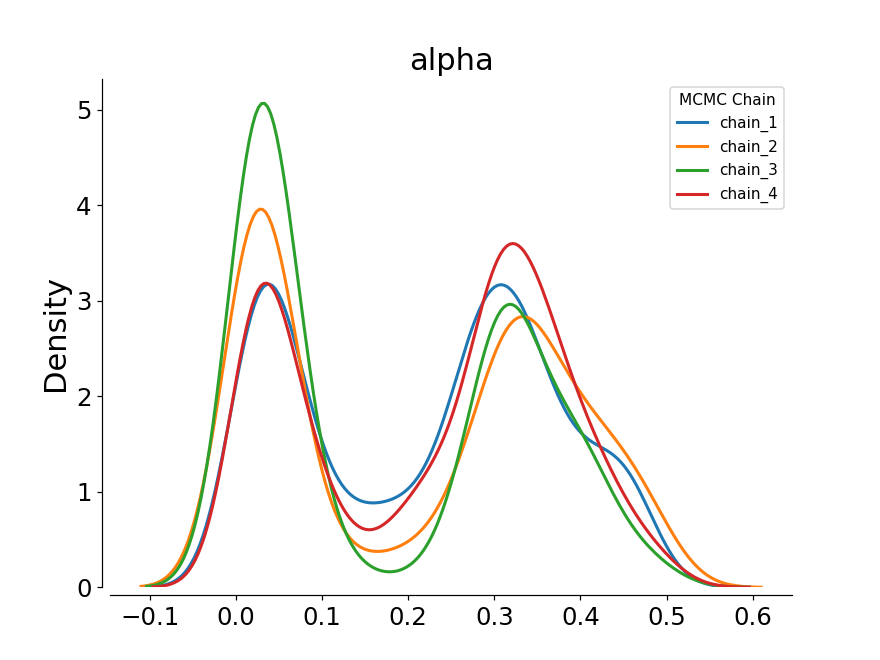

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [21]:
visualize_density(param_wh, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/White_alpha_density')

iterations    999.500000
chain_1         0.240898
chain_2         0.214541
chain_3         0.286599
chain_4         0.062108
dtype: float64


<IPython.core.display.Javascript object>


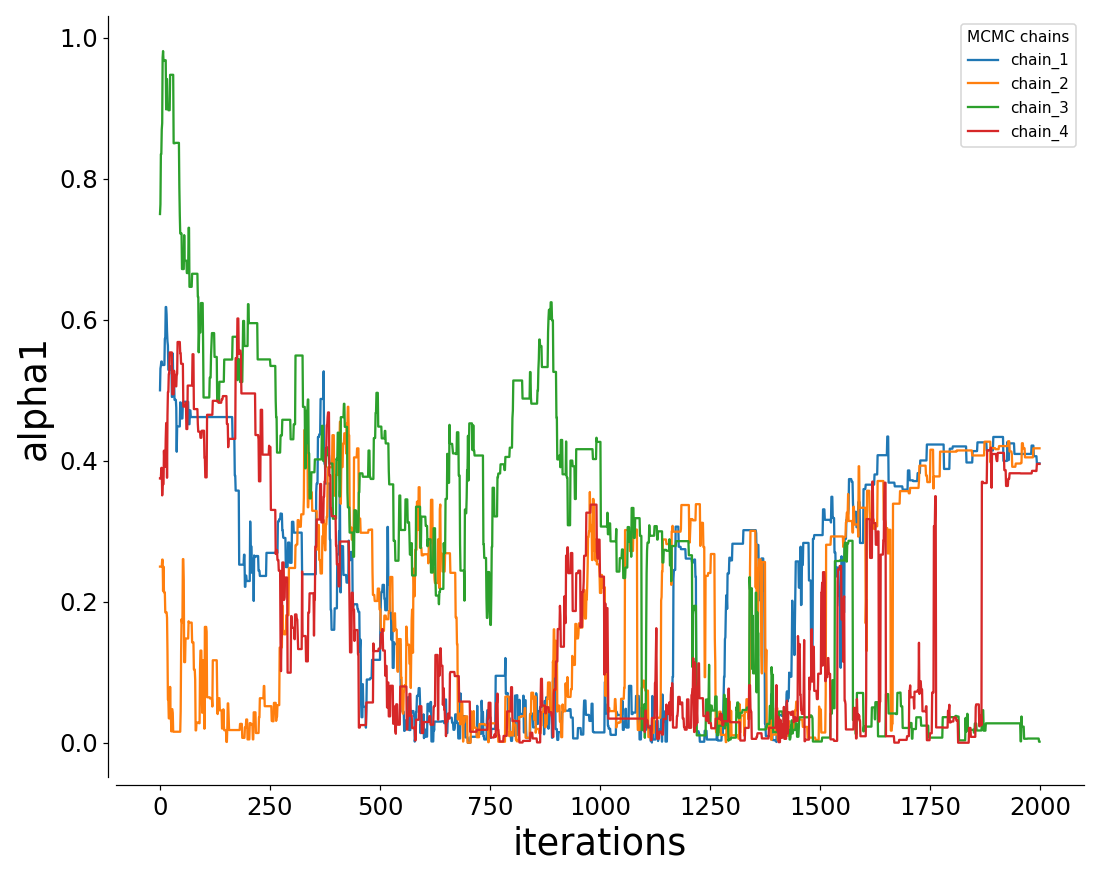

In [22]:
visualize_fitting(param_wb, 1, 'alpha1', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_alpha1')

<IPython.core.display.Javascript object>


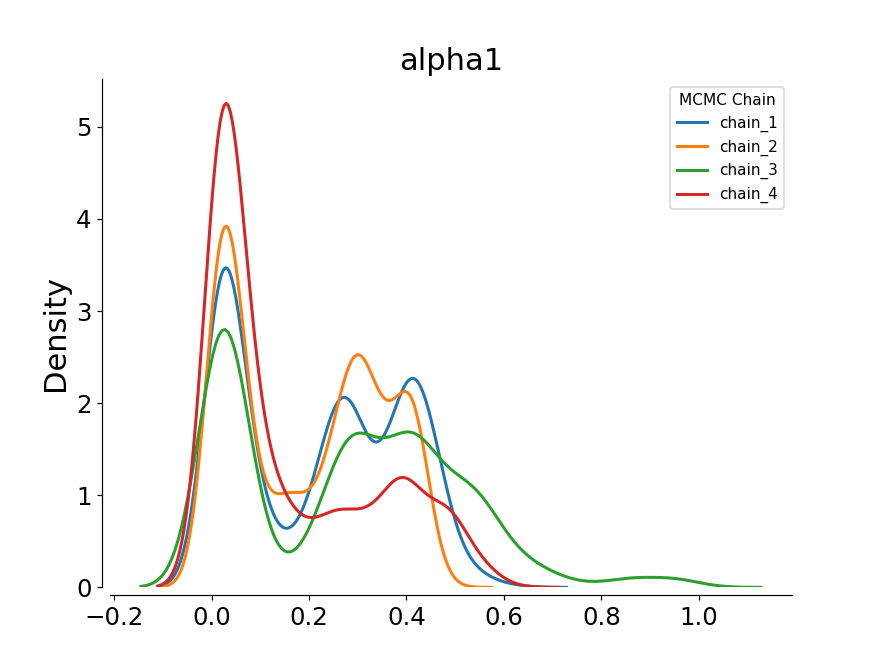

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [23]:
visualize_density(param_wb, 1, 'alpha1', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/Weber_alpha1')

iterations    999.500000
chain_1         0.050743
chain_2         0.047974
chain_3         0.040663
chain_4         0.037784
dtype: float64


<IPython.core.display.Javascript object>


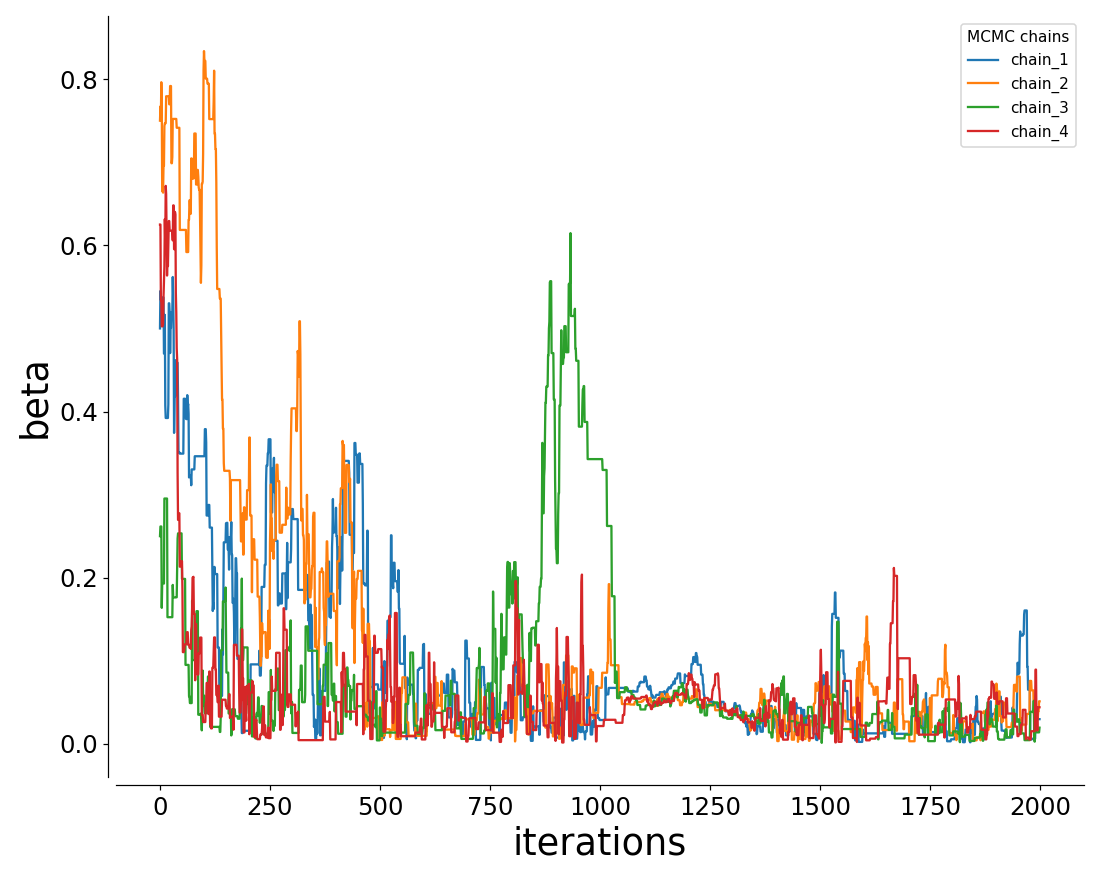

In [24]:
visualize_fitting(param_wh, 2, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/White_beta')

<IPython.core.display.Javascript object>


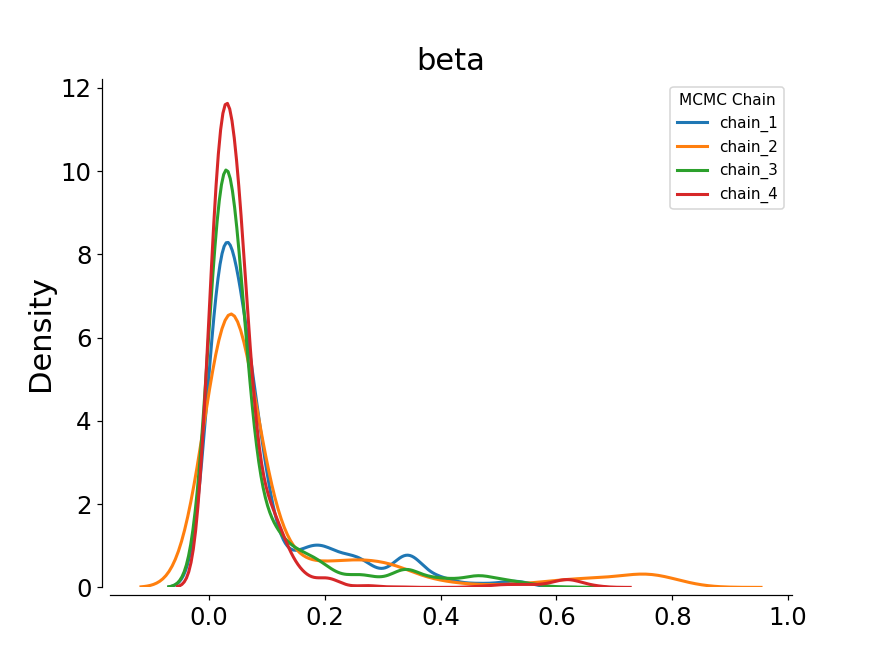

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [25]:
visualize_density(param_wh, 2, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/White_beta_density')

iterations    999.500000
chain_1         0.182298
chain_2         0.150214
chain_3         0.147063
chain_4         0.145810
dtype: float64


<IPython.core.display.Javascript object>


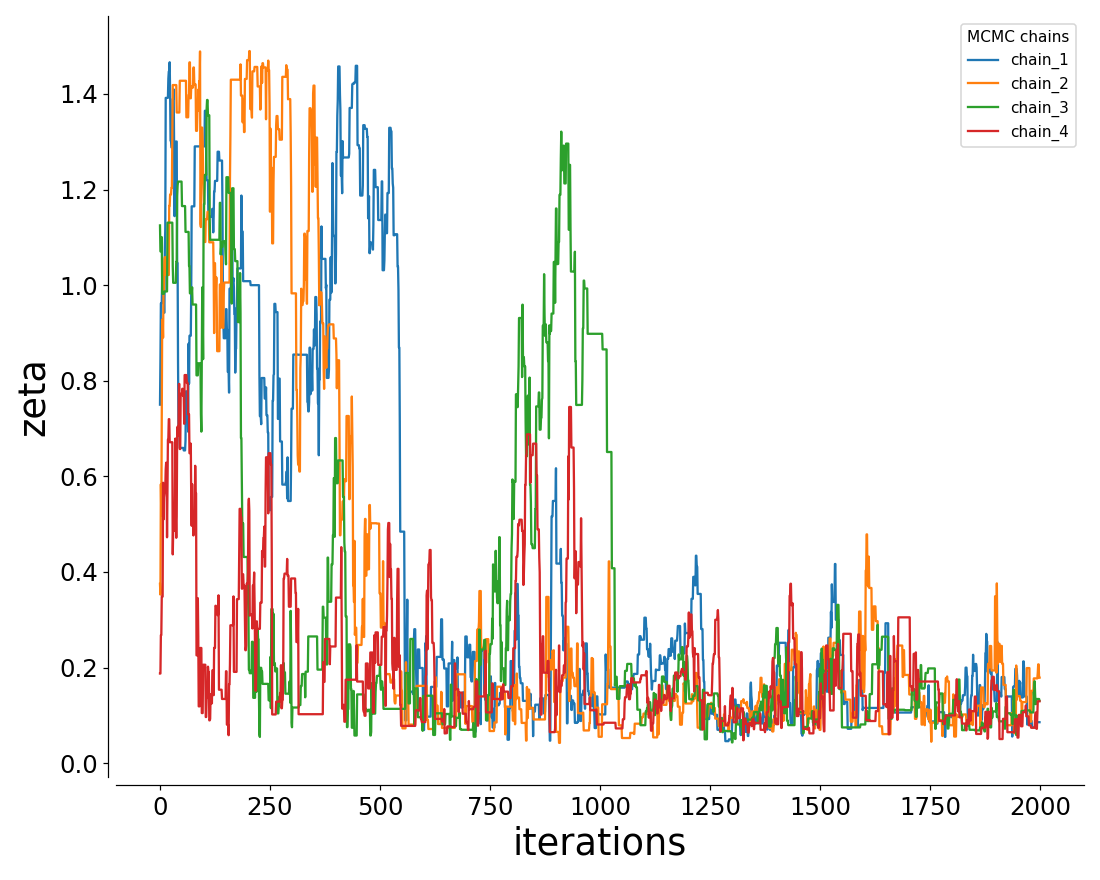

In [26]:
visualize_fitting(param_wh, 3, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/White_zeta')

<IPython.core.display.Javascript object>


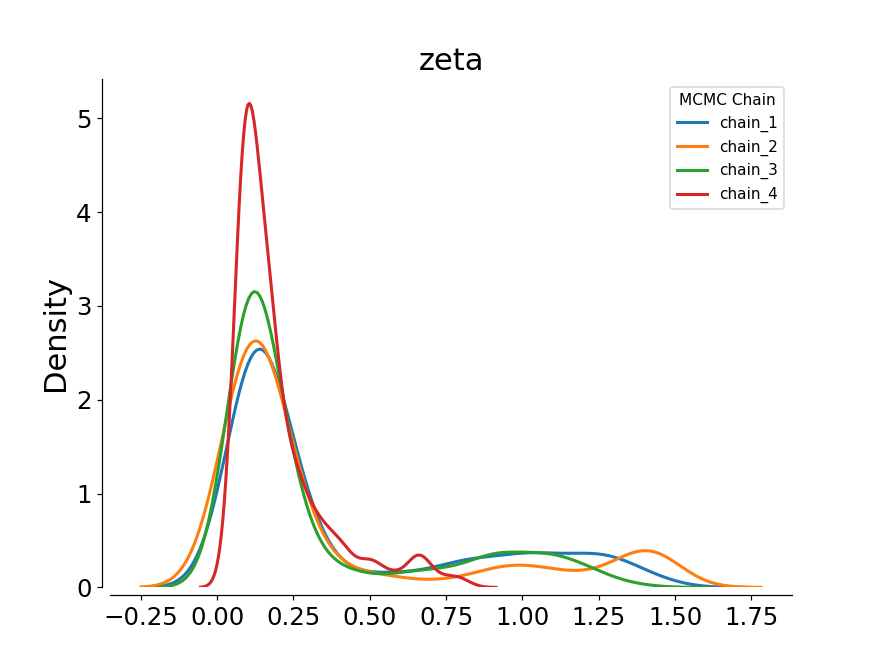

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [27]:
visualize_density(param_wh, 3, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/White_zeta_density')

## noise: none

In [30]:
file_none = open('C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/noise_none_agentid_0.pkl', 'rb')
none = pickle.load(file_none)
param_none = none[0] #shape: (2000, 4, 3)
lkd_none = none[1]
mrglkd_none = none[2] 
inference_validated_none = none[3]
file_none.close()

iterations    999.500000
chain_1         0.022313
chain_2         0.025825
chain_3         0.026787
chain_4         0.024623
dtype: float64


<IPython.core.display.Javascript object>


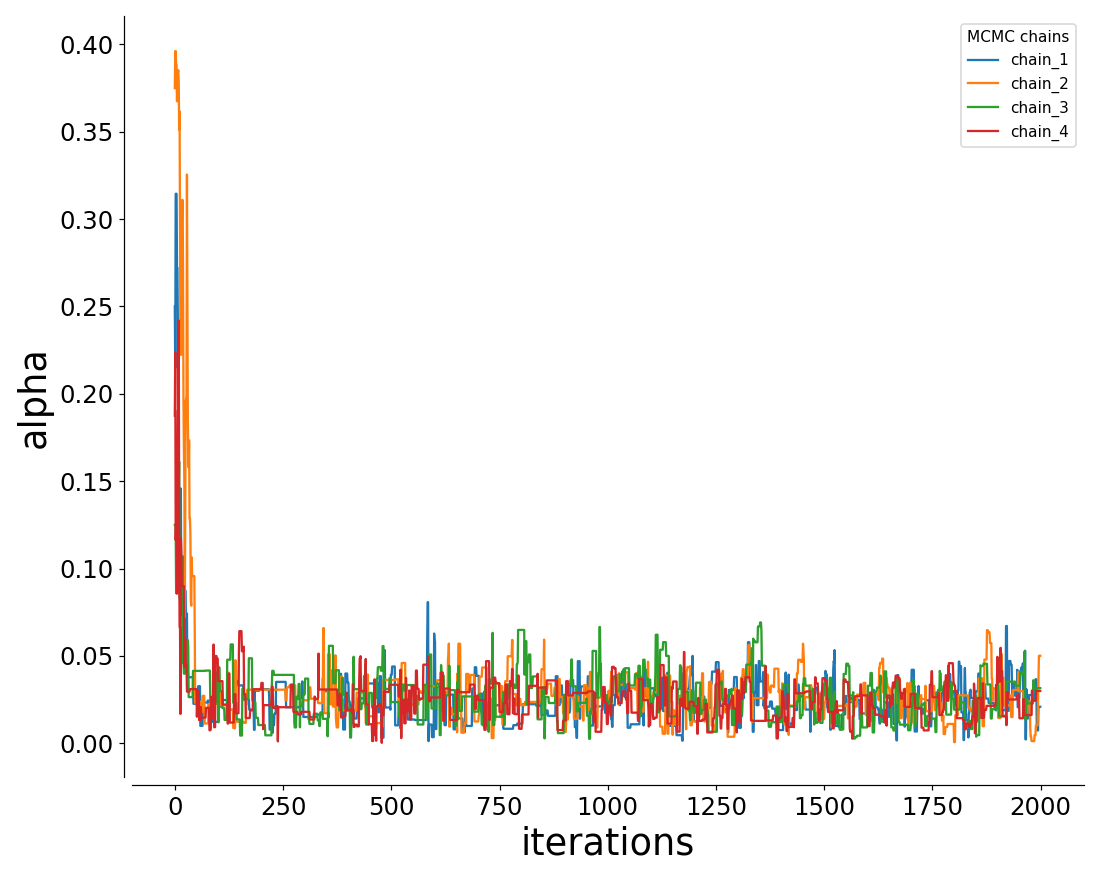

In [31]:
visualize_fitting(param_none, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/none_alpha')

<IPython.core.display.Javascript object>


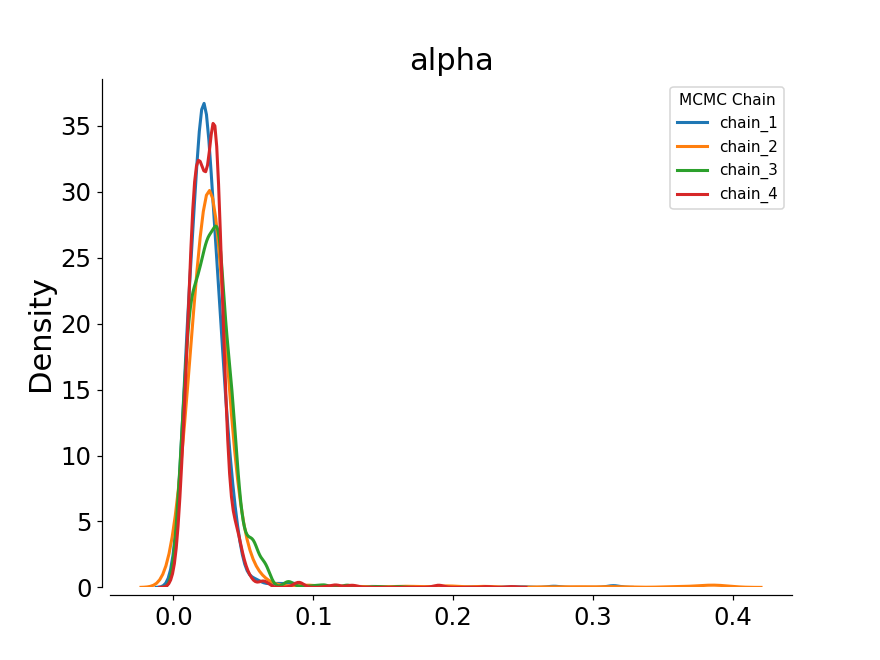

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [32]:
visualize_density(param_none, 0, 'alpha', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/none_alpha_density')

iterations    999.500000
chain_1         0.355441
chain_2         0.364899
chain_3         0.358188
chain_4         0.355108
dtype: float64


<IPython.core.display.Javascript object>


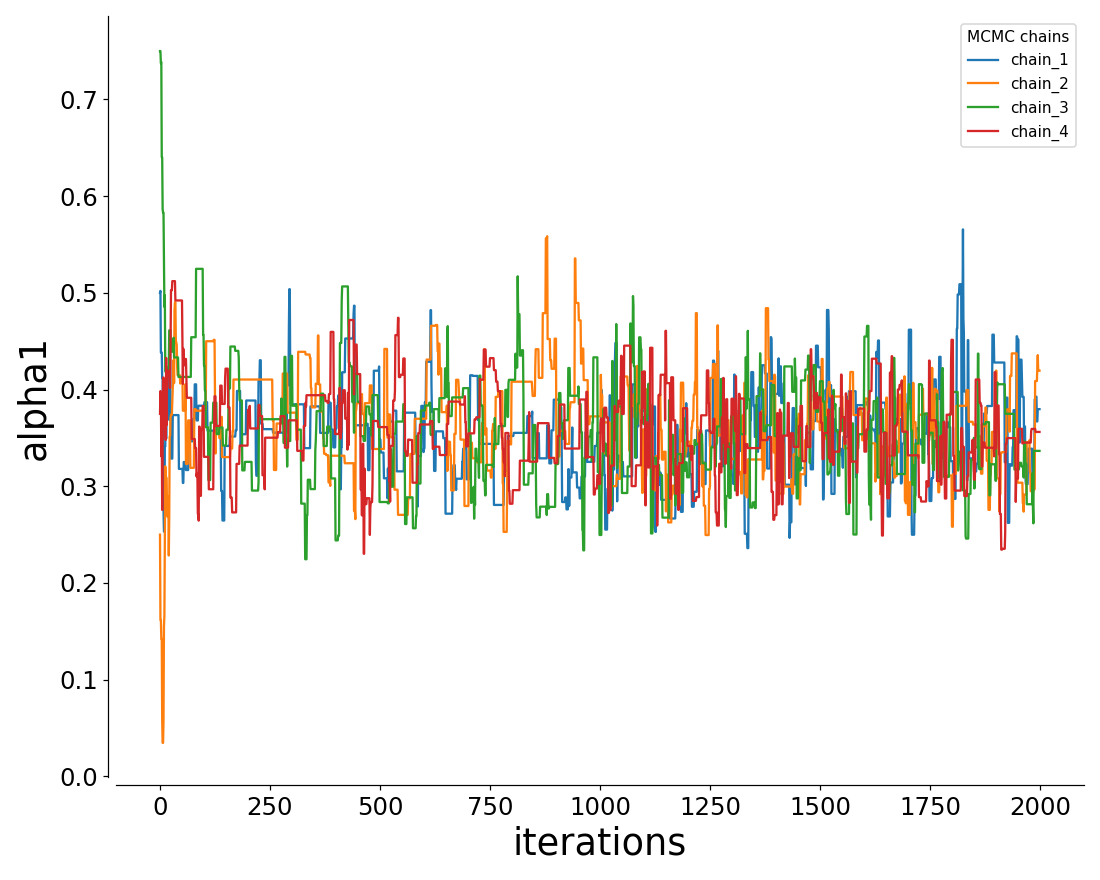

In [33]:
visualize_fitting(param_none, 1, 'alpha1', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/none_alpha1')

<IPython.core.display.Javascript object>


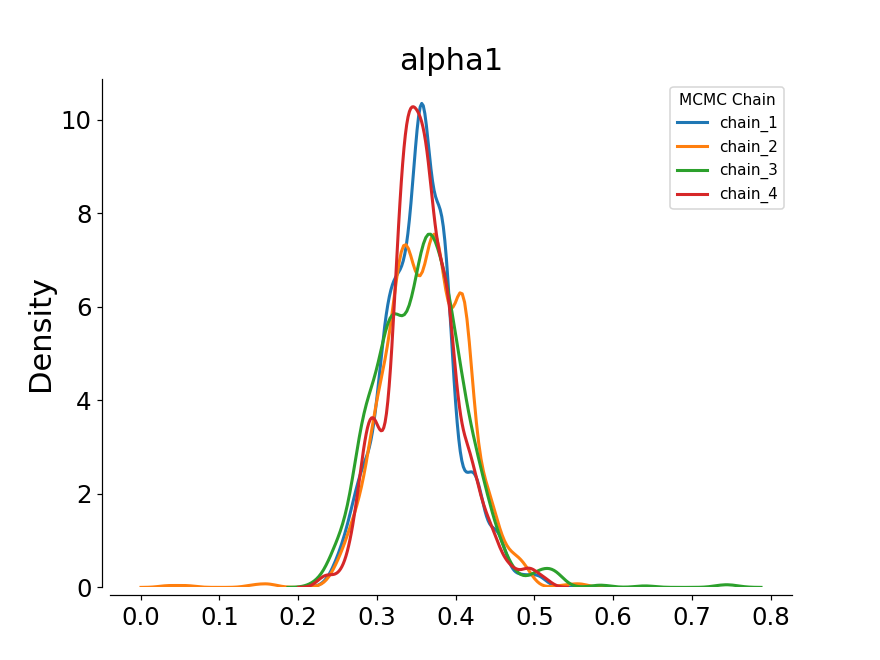

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [34]:
visualize_density(param_none, 1, 'alpha1', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/none_alpha1_density')

iterations    999.500000
chain_1         0.108446
chain_2         0.112378
chain_3         0.111011
chain_4         0.108638
dtype: float64


<IPython.core.display.Javascript object>


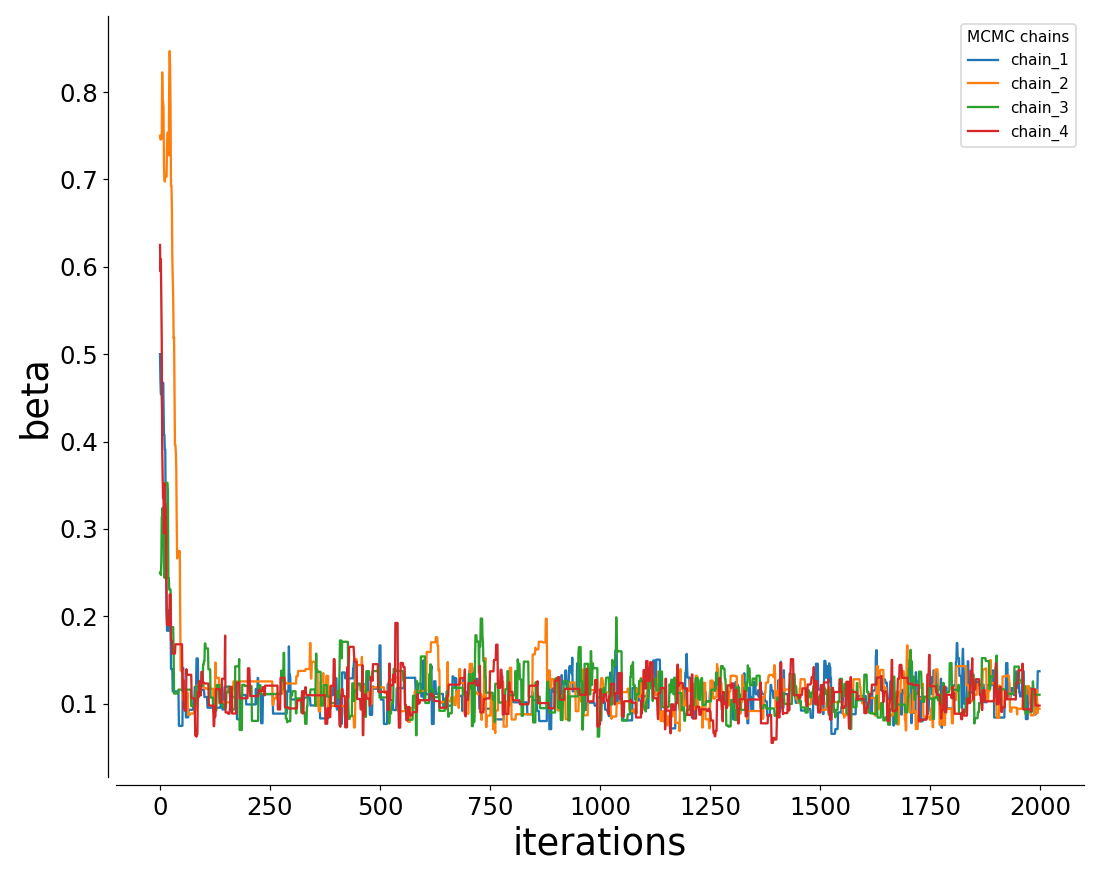

In [35]:
visualize_fitting(param_none, 2, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/none_beta')

<IPython.core.display.Javascript object>


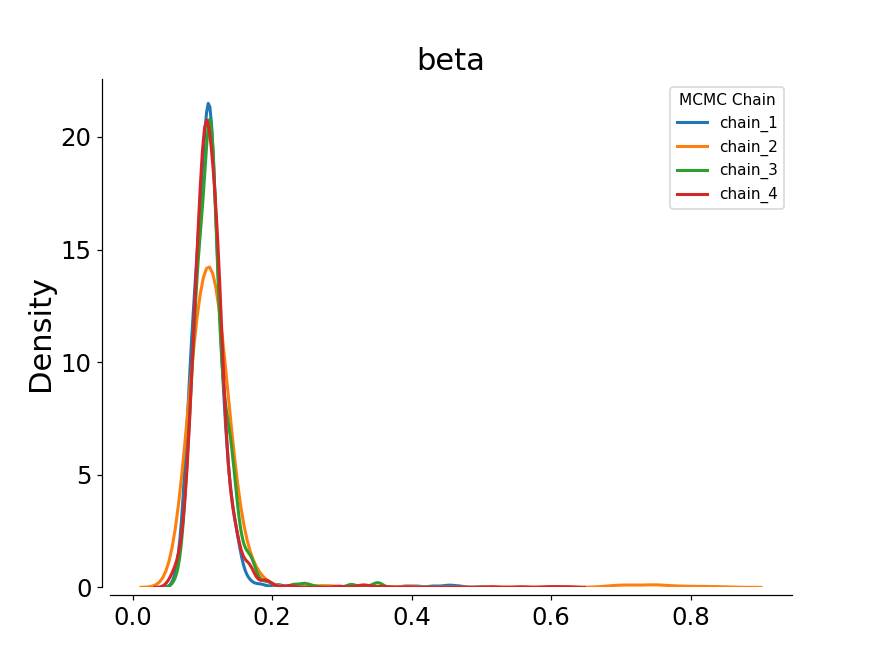

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [36]:
visualize_density(param_none, 2, 'beta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/none_beta_density')

iterations    999.500000
chain_1         0.706422
chain_2         0.462630
chain_3         0.589220
chain_4         0.618188
dtype: float64


<IPython.core.display.Javascript object>


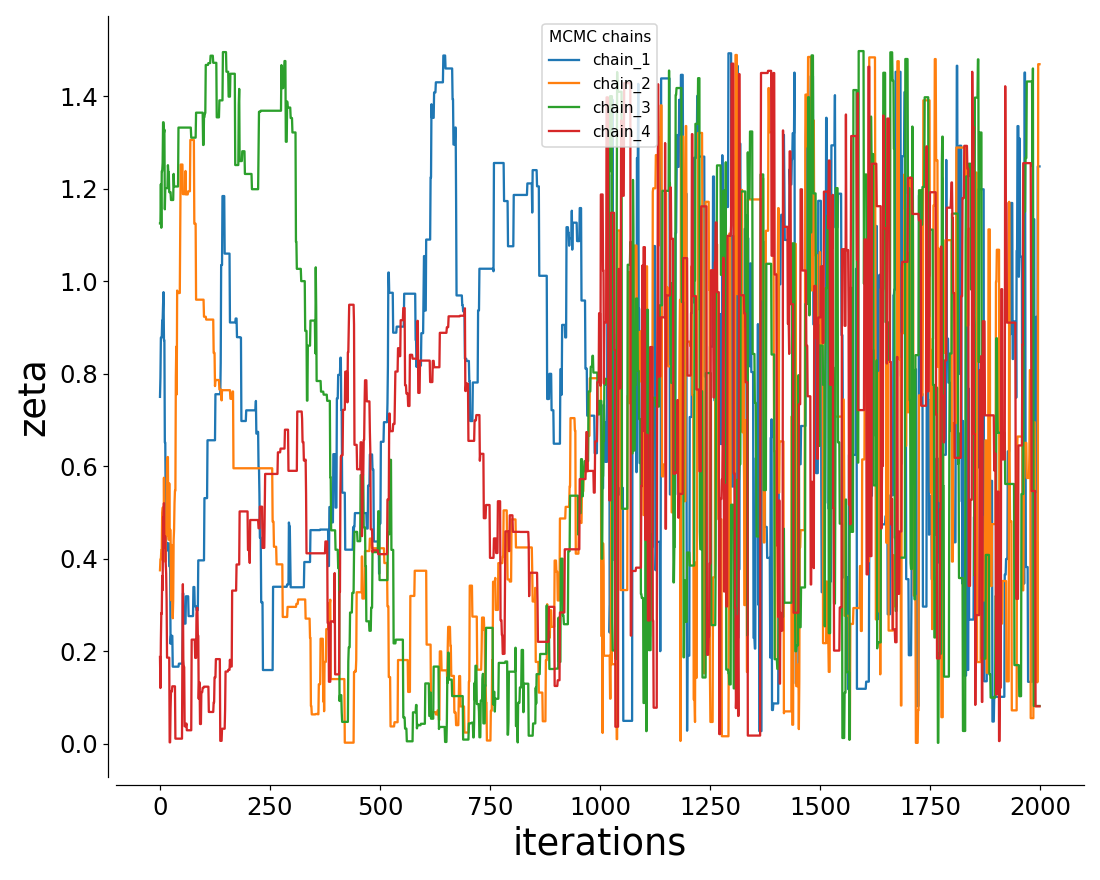

In [37]:
visualize_fitting(param_none, 3, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/none_zeta')

<IPython.core.display.Javascript object>


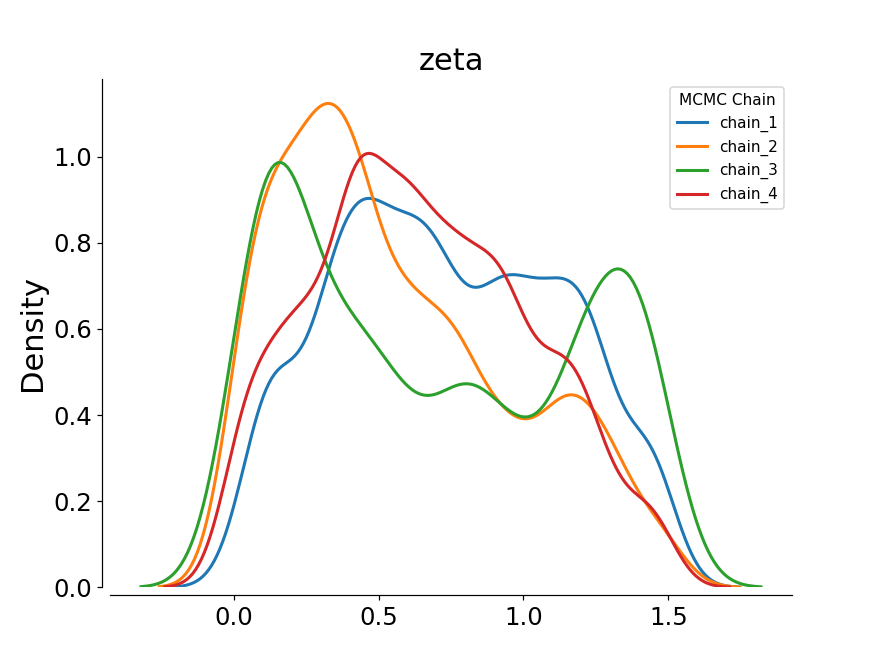

C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\canlab\Anaconda3\envs\influenca\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

In [38]:
visualize_density(param_none, 3, 'zeta', 'C:/Users/canlab/Desktop/Modelling_Influenca/Results/4_parameter/none_zeta_density')